In [66]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from datapipeline import DataPipeline
from clusterpipeline import ClusterPipeline
from portfoliopipeline import PortfolioPipeline
from backtestpipeline import BacktestPipeline
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import matplotlib.pyplot as plt
from matplotlib import gridspec

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'Wanted 0 tickers but got 1193 tickers'

'##### Filtering #####'

"Failed volume columns Index(['AAA', 'AAME', 'AAPB', 'ACAHU', 'ACAX', 'ACVA', 'ADIV', 'ADV', 'ADXS',\n       'AEL.PRB',\n       ...\n       'WLMSQ', 'WNNR.U', 'WRB.PRE', 'XBIO', 'XC', 'XDAT', 'XRTX', 'XTWY',\n       'YOTAR', 'YS'],\n      dtype='object', length=567)"

"Failed price columns Index(['AAA', 'AACG', 'AAME', 'AAPB', 'AATC', 'AAU', 'ACAHU', 'ACAX', 'ACTG',\n       'ACVA',\n       ...\n       'WINV', 'WLMSQ', 'WNNR.U', 'WRB.PRE', 'XC', 'XDAT', 'XRTX', 'XTWY',\n       'YOTAR', 'YS'],\n      dtype='object', length=531)"

'##### Coordinating #####'

(251, 558)

'Df new start date 2018-02-02, removed first 22 or 8.76% rows'

'0 original tickers to 531 tickers'

'229 + 252 + 0'

'531 to 531 columns - 0 NA columns dropped'

'Dropped [] columns'

'531 to 531 columns - 0 NA columns dropped'

'Dropped [] columns'

'40.224018356519274% of variance - 20 components'

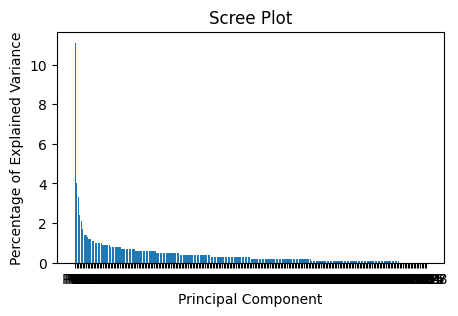

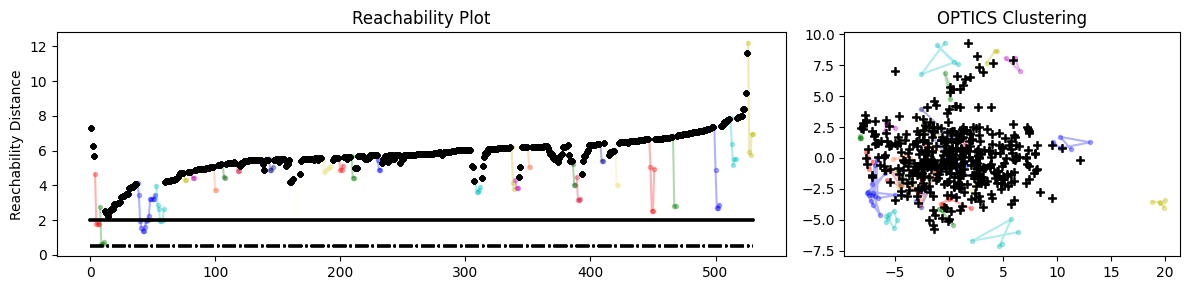

'Testing 6 pairs in cluster 0'

'Testing 6 pairs in cluster 1'

'Testing 105 pairs in cluster 2'

'Testing 21 pairs in cluster 3'

'Testing 3 pairs in cluster 4'

'Testing 3 pairs in cluster 5'

'Testing 3 pairs in cluster 6'

'Testing 3 pairs in cluster 7'

'Testing 3 pairs in cluster 8'

'Testing 6 pairs in cluster 9'

'Testing 10 pairs in cluster 10'

'Testing 28 pairs in cluster 11'

'Found pair with negative beta - IPG MNST'

'Testing 6 pairs in cluster 12'

'Testing 3 pairs in cluster 13'

'Testing 3 pairs in cluster 14'

'Testing 10 pairs in cluster 15'

'Testing 3 pairs in cluster 16'

'Testing 3 pairs in cluster 17'

'Testing 3 pairs in cluster 18'

'Testing 3 pairs in cluster 19'

'Testing 6 pairs in cluster 20'

'Testing 3 pairs in cluster 21'

'Testing 3 pairs in cluster 22'

'Testing 3 pairs in cluster 23'

'Testing 10 pairs in cluster 24'

'Testing 3 pairs in cluster 25'

'Testing 10 pairs in cluster 26'

'Testing 10 pairs in cluster 27'

'Testing 10 pairs in cluster 28'

'Tested 289 pairs in total'

'265 failed cointegration test'

'2 failed H exp criterion'

'9 failed half-life criterion'

'0 failed avg zero cross period criterion'

'Found 12 pairs'

,Stock1,Stock2,Beta,p,H,Half-life,Avg zero cross period
0,IYW,ONEQ,1.649588,4.955302e-03,0.407525,7.219806,8.0
1,IEFA,IEUR,1.258047,3.652744e-03,0.265637,1.557846,6.0
2,IVLU,SCJ,0.235752,4.179210e-03,0.308360,27.109863,9.0
3,MXI,SCHC,1.534332,4.827862e-03,0.315991,3.109902,7.0
4,LRCX,MKSI,1.265637,3.578129e-03,0.472565,6.158260,7.0
5,COR,IPG,2.850087,6.665586e-03,0.343220,11.381127,7.0
6,IPG,MCK,0.018983,2.972950e-05,0.370760,5.541691,8.0
7,IPG,WHR,0.004720,1.438609e-04,0.355112,6.169990,8.0
8,IYR,RWR,0.773390,3.150854e-03,0.386431,2.084295,7.0
9,FBZ,FLBR,0.492326,4.994729e-03,0.286057,2.112831,5.0


In [67]:
data_pipe = DataPipeline([], (2018, 1, 1), (2019, 1, 1), (2020, 1, 1), (2020, 1, 1), 'D')
cluster_pipe = ClusterPipeline(pca_factors=20) 
portfolio_pipe = PortfolioPipeline()
backtest_pipe = BacktestPipeline()

training_df, validation_df, testing_df, training_and_validation_df = data_pipe.preprocess_and_split_data()

clusters = [training_df.columns] if training_df.shape[1] < 15 else cluster_pipe.find_clusters(training_df)

validation_pairs = portfolio_pipe.find_pairs_from_clusters(training_df, clusters)

'Testing 6 pairs in cluster 0'

'Testing 6 pairs in cluster 1'

'Testing 105 pairs in cluster 2'

'Testing 21 pairs in cluster 3'

'Testing 3 pairs in cluster 4'

'Testing 3 pairs in cluster 5'

'Testing 3 pairs in cluster 6'

'Testing 3 pairs in cluster 7'

'Testing 3 pairs in cluster 8'

'Testing 6 pairs in cluster 9'

'Testing 10 pairs in cluster 10'

'Testing 28 pairs in cluster 11'

'Found pair with negative beta - IPG MNST'

'Testing 6 pairs in cluster 12'

'Testing 3 pairs in cluster 13'

'Testing 3 pairs in cluster 14'

'Testing 10 pairs in cluster 15'

'Testing 3 pairs in cluster 16'

'Testing 3 pairs in cluster 17'

'Testing 3 pairs in cluster 18'

'Testing 3 pairs in cluster 19'

'Testing 6 pairs in cluster 20'

'Testing 3 pairs in cluster 21'

'Testing 3 pairs in cluster 22'

'Testing 3 pairs in cluster 23'

'Testing 10 pairs in cluster 24'

'Testing 3 pairs in cluster 25'

'Testing 10 pairs in cluster 26'

'Testing 10 pairs in cluster 27'

'Testing 10 pairs in cluster 28'

'Tested 289 pairs in total'

'265 failed cointegration test'

'2 failed H exp criterion'

'9 failed half-life criterion'

'0 failed avg zero cross period criterion'

'Found 12 pairs'

,Stock1,Stock2,Beta,p,H,Half-life,Avg zero cross period
0,IYW,ONEQ,1.649588,4.955302e-03,0.407525,7.219806,8.0
1,IEFA,IEUR,1.258047,3.652744e-03,0.265637,1.557846,6.0
2,IVLU,SCJ,0.235752,4.179210e-03,0.308360,27.109863,9.0
3,MXI,SCHC,1.534332,4.827862e-03,0.315991,3.109902,7.0
4,LRCX,MKSI,1.265637,3.578129e-03,0.472565,6.158260,7.0
5,COR,IPG,2.850087,6.665586e-03,0.343220,11.381127,7.0
6,IPG,MCK,0.018983,2.972950e-05,0.370760,5.541691,8.0
7,IPG,WHR,0.004720,1.438609e-04,0.355112,6.169990,8.0
8,IYR,RWR,0.773390,3.150854e-03,0.386431,2.084295,7.0
9,FBZ,FLBR,0.492326,4.994729e-03,0.286057,2.112831,5.0


'[IYW ONEQ] Entry z threshold: 2.500 Exit z threshold: 0.000 Cum PnL: -35.680'

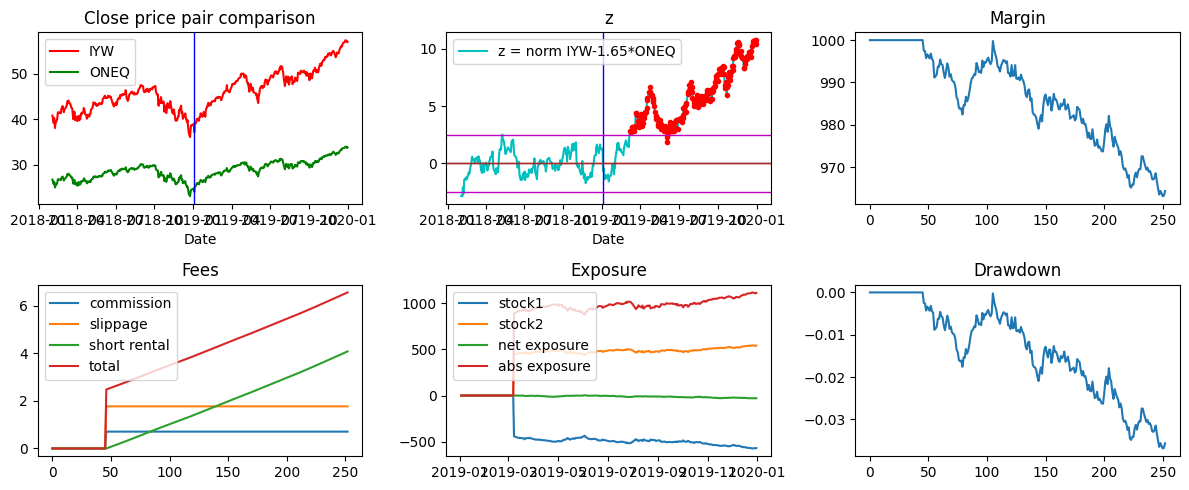

'[IEFA IEUR] Entry z threshold: 2.500 Exit z threshold: 0.667 Cum PnL: -0.568'

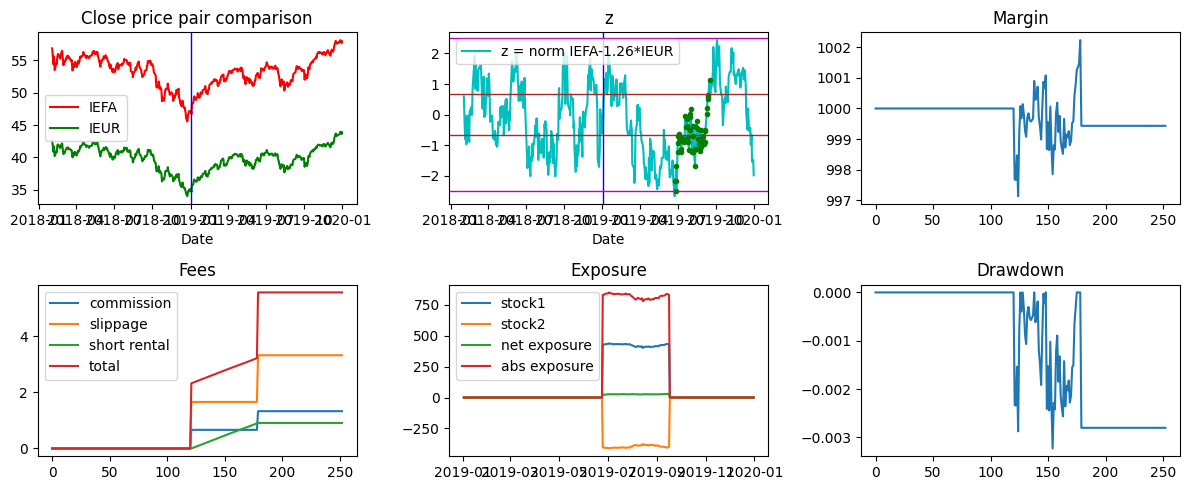

'[IVLU SCJ] Entry z threshold: 2.500 Exit z threshold: 1.000 Cum PnL: 23.179'

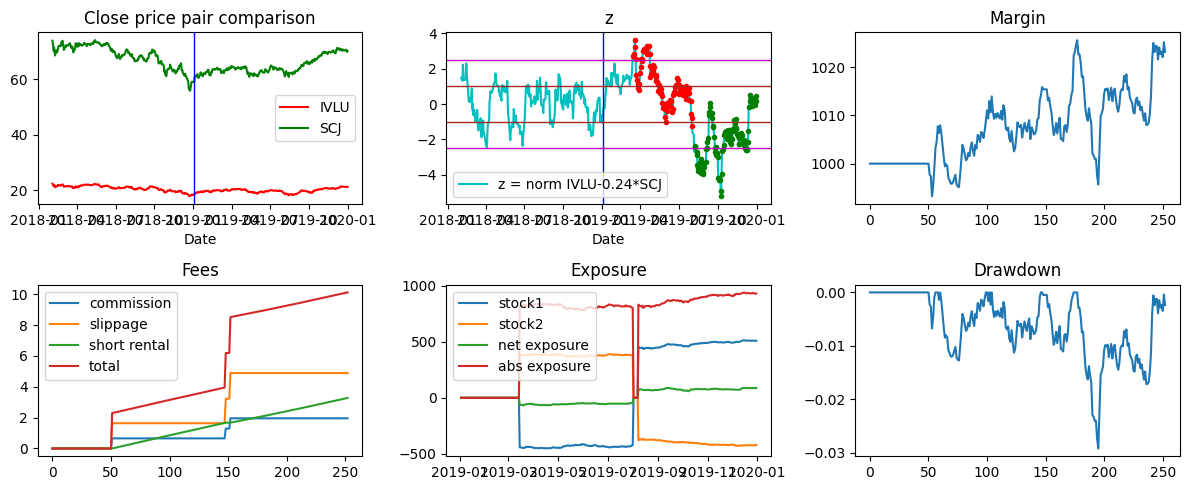

'[MXI SCHC] Entry z threshold: 2.125 Exit z threshold: 0.000 Cum PnL: -11.323'

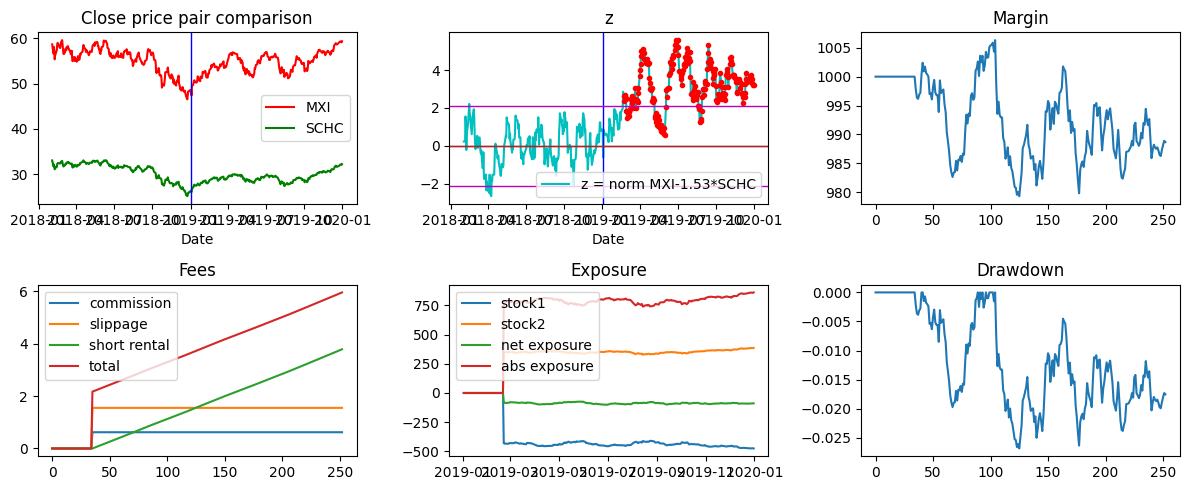

'[LRCX MKSI] Entry z threshold: 2.500 Exit z threshold: 0.000 Cum PnL: -277.716'

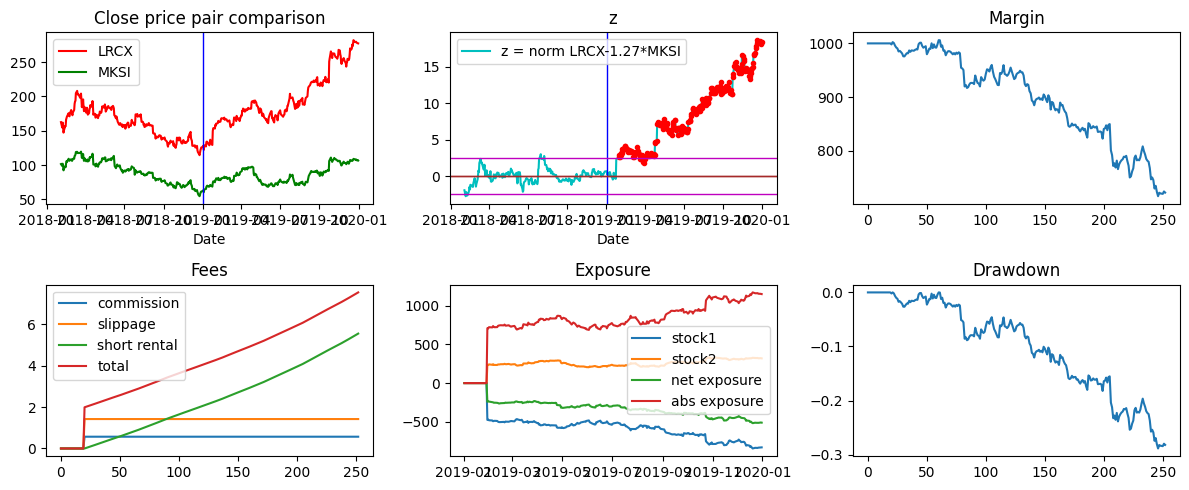

'[COR IPG] Entry z threshold: 1.750 Exit z threshold: 0.000 Cum PnL: 197.927'

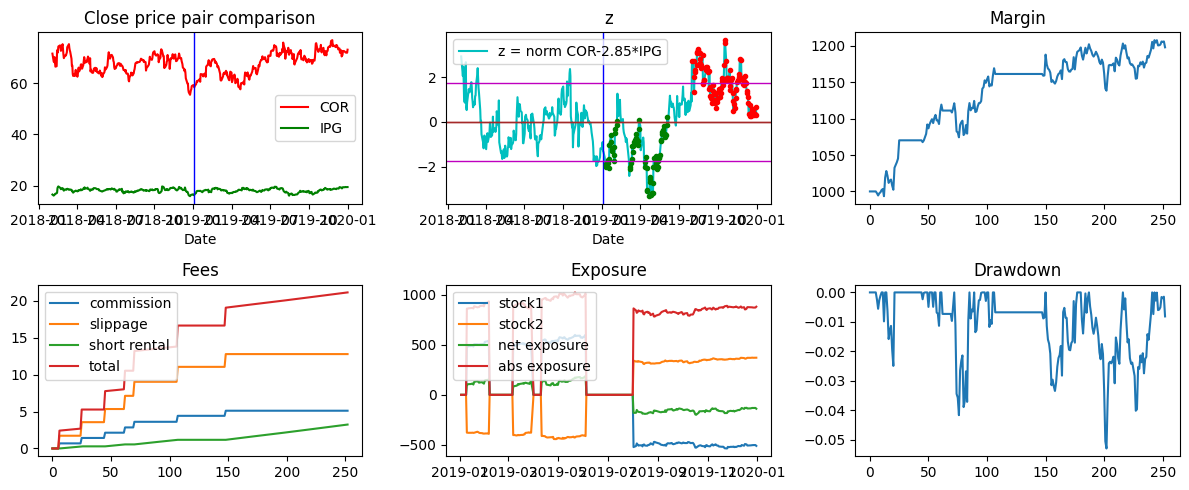

'[IPG MCK] Entry z threshold: 1.375 Exit z threshold: 0.667 Cum PnL: 235.287'

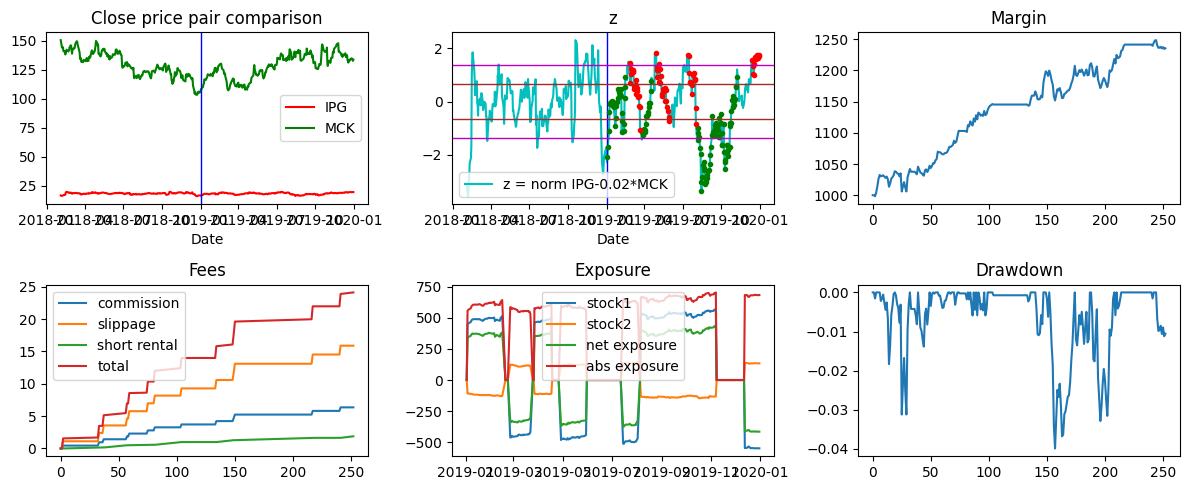

'[IPG WHR] Entry z threshold: 1.750 Exit z threshold: 0.667 Cum PnL: 179.172'

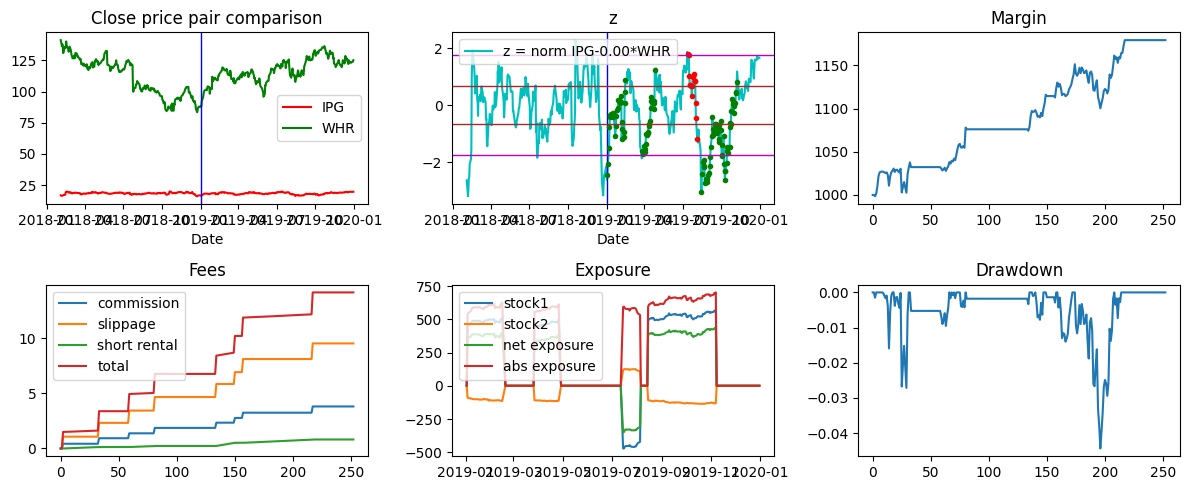

'[IYR RWR] Entry z threshold: 2.500 Exit z threshold: 0.000 Cum PnL: -31.971'

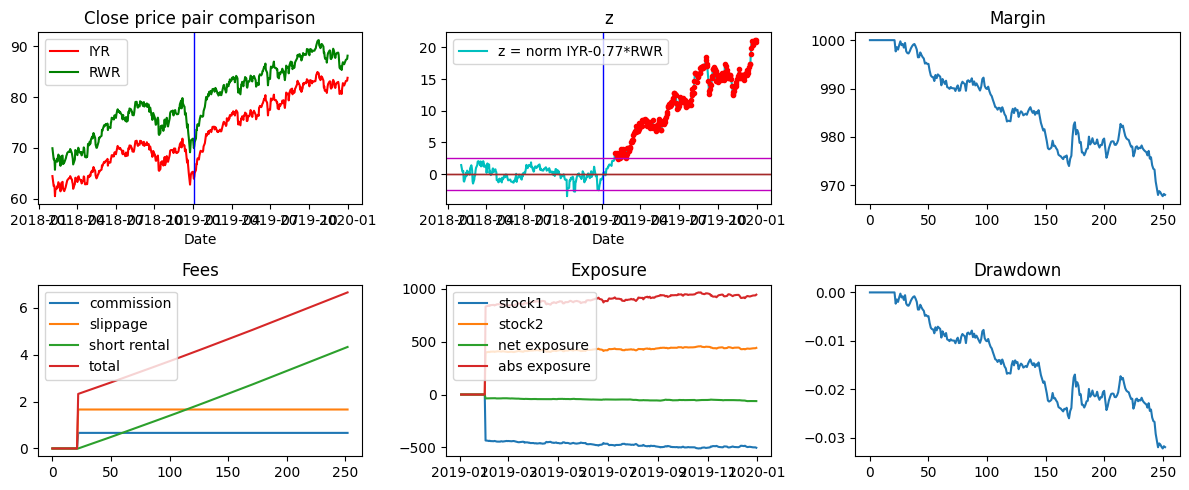

'[FBZ FLBR] Entry z threshold: 2.125 Exit z threshold: 0.667 Cum PnL: -50.987'

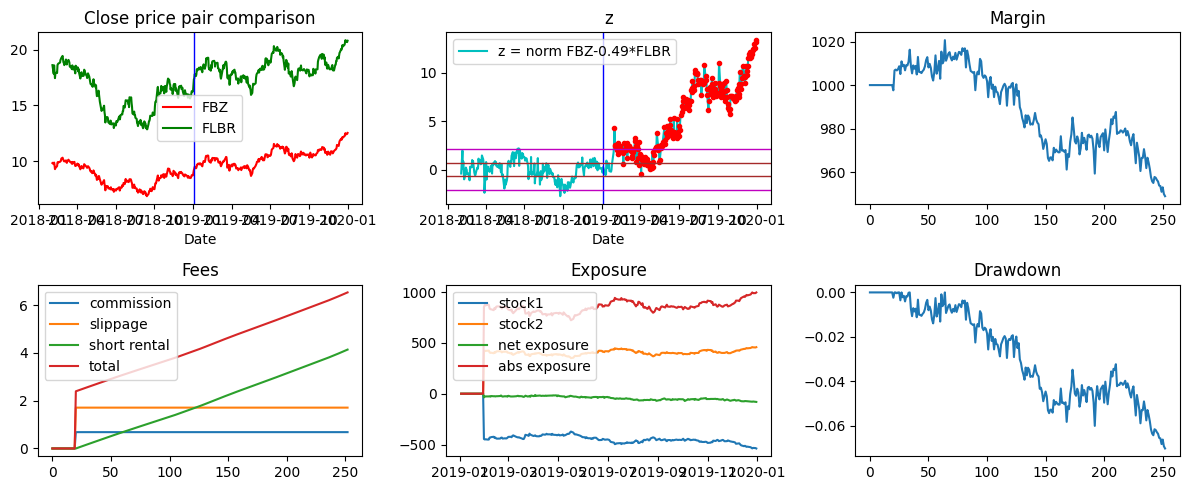

'[AGG CMBS] Entry z threshold: 2.500 Exit z threshold: 0.000 Cum PnL: -12.298'

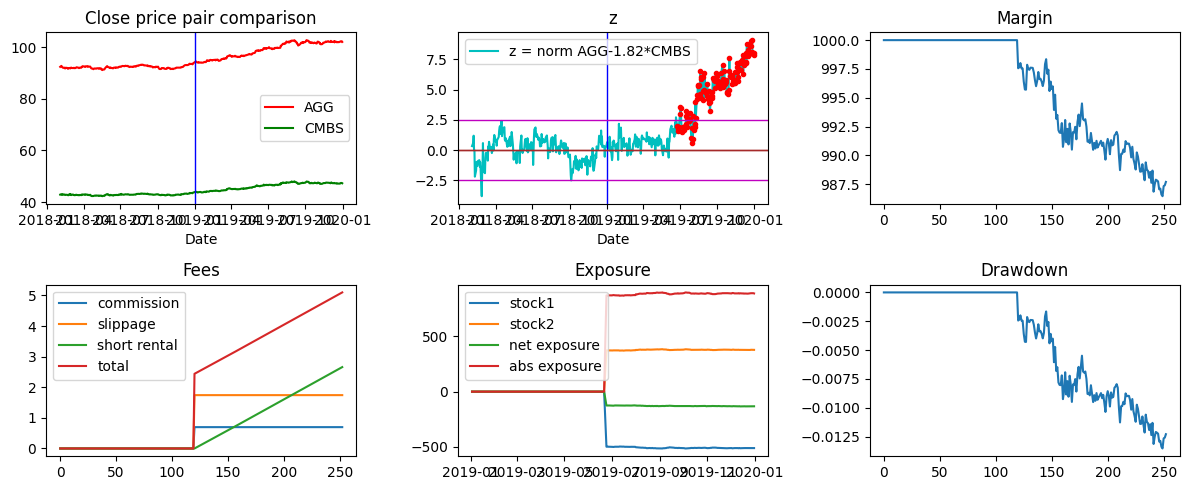

'[BIV CMBS] Entry z threshold: 2.125 Exit z threshold: 0.000 Cum PnL: -17.353'

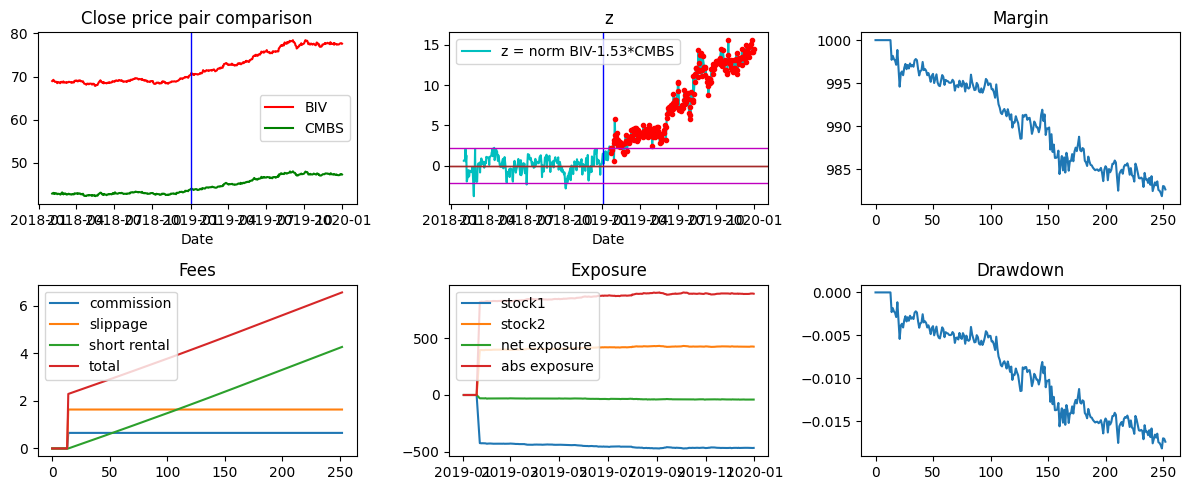

'3/12 = 25.00% have +PnL'

dict_keys(['COR-IPG', 'IPG-MCK', 'IPG-WHR'])

In [68]:
# get pairs for validation test
validation_pairs = portfolio_pipe.find_pairs_from_clusters(training_df, clusters)
# if validation_pairs is None or validation_pairs.shape[0] == 0:
# 	display(f'No validated pairs')
# 	return

initial_capital = 1000

# validation backtest
validation_backtest_results = backtest_pipe.validation_backtest(training_df, validation_df, validation_pairs, initial_capital=initial_capital)

for pair_key in validation_backtest_results:
	backtest_pipe.plot_pair_backtest(validation_backtest_results, pair_key)



# filter results
filtered_validation_backtest_results = {}

for pair_key in validation_backtest_results:
	margin = validation_backtest_results[pair_key]['margin']
	if (margin[-1]-margin[0])/margin[0] >= 0.1:
		filtered_validation_backtest_results[pair_key] = validation_backtest_results[pair_key]

num_successful = len(filtered_validation_backtest_results)
num_total = len(validation_backtest_results)
display(f'{num_successful}/{num_total} = {num_successful/num_total*100:.2f}% have +PnL')
display(filtered_validation_backtest_results.keys())

'[COR IPG] Entry z threshold: 1.750 Exit z threshold: 0.000 Cum PnL: 197.927'

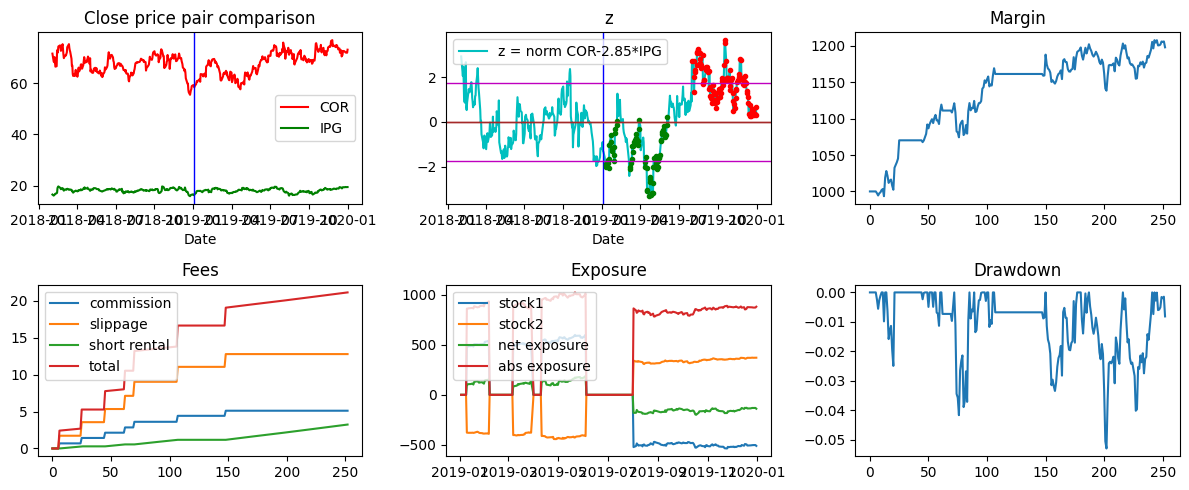

'[IPG MCK] Entry z threshold: 1.375 Exit z threshold: 0.667 Cum PnL: 235.287'

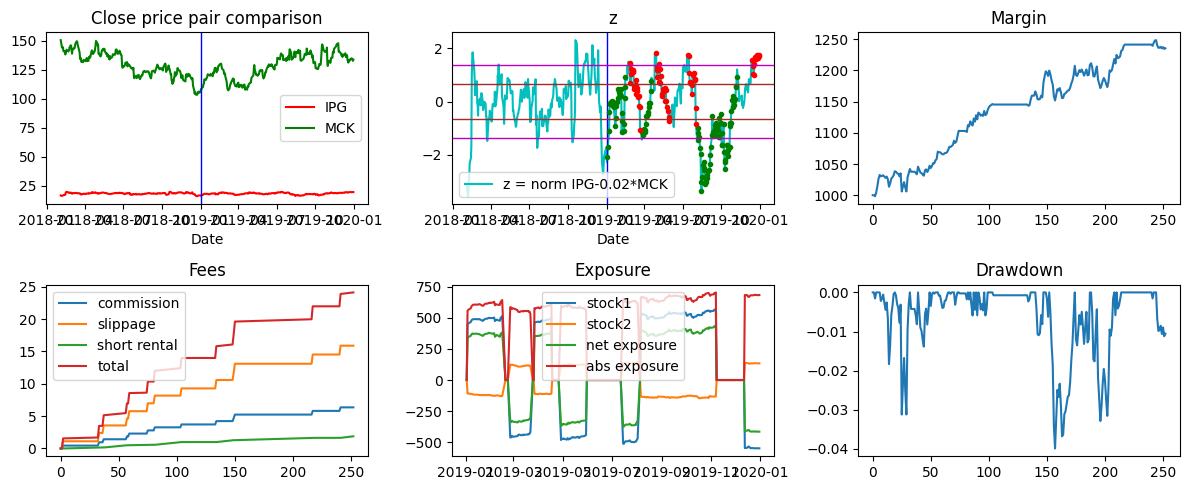

'[IPG WHR] Entry z threshold: 1.750 Exit z threshold: 0.667 Cum PnL: 179.172'

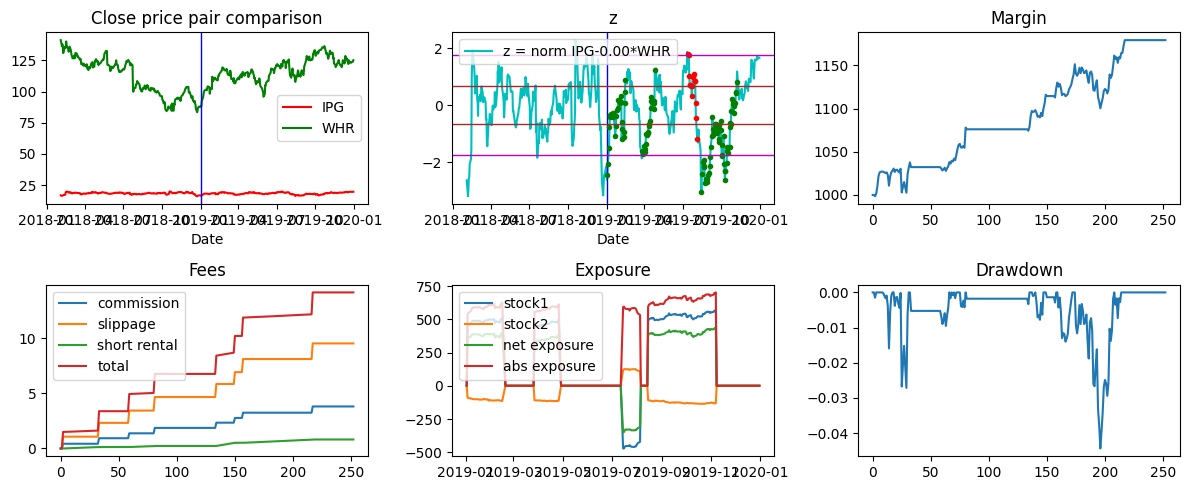

In [71]:
for pair_key in filtered_validation_backtest_results:
	backtest_pipe.plot_pair_backtest(filtered_validation_backtest_results, pair_key)

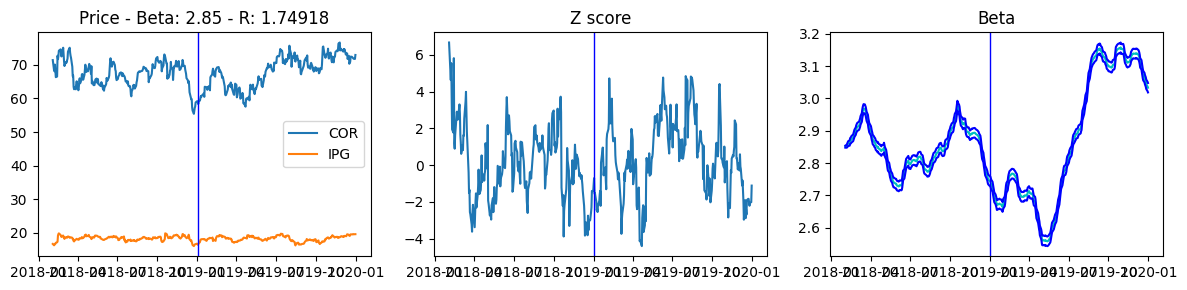

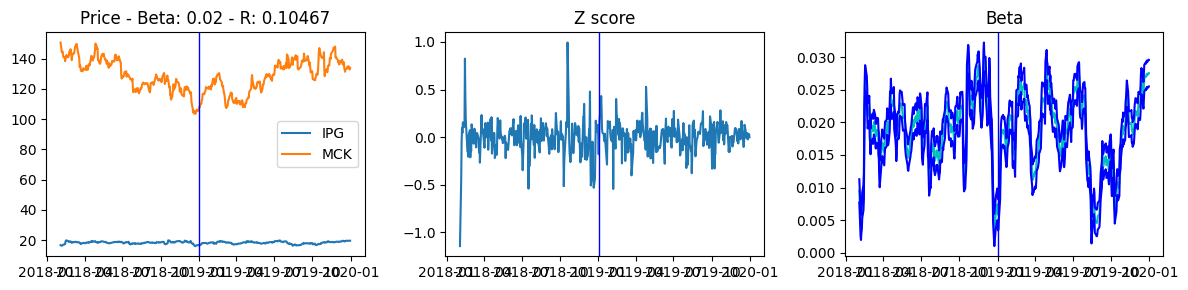

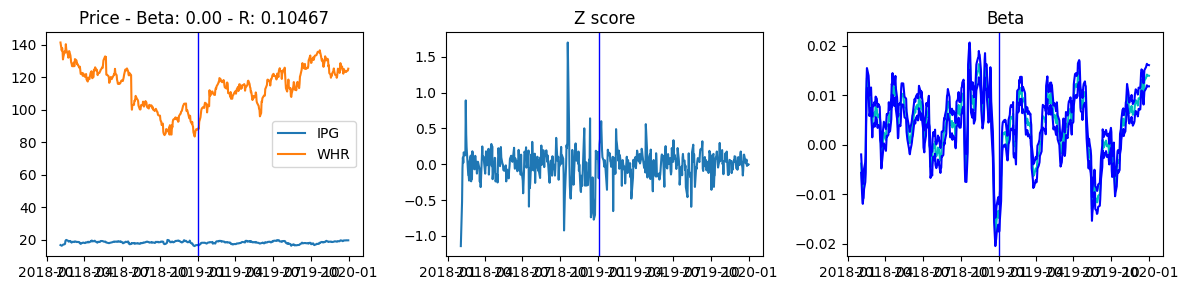

In [72]:
# I realised the whole kalman filter literally makes no sense
# my initial rationale behind using this is 
# cointegration was failing and I wanted to use kalman filter to "adapt" to changes in beta
# but this is useless!
# when beta changes a lot, 
# 1. it is likely cointegration has failed
# 2. there is a lot of noise
# 3. there has been a systemic shift, so there is now a new mean beta

# solving a non-existent problem because it is so hard to distinguish cases 2 and 3 which is like 0.01% out of all the cointegration failing cases!!!
# I was basically trying to solve a failing cointegration problem by making it appear to be cointegrated...
# when the issue itself is how to ensure higher chances of cointegration
# maybe should look into cross-sectional factors and stuff to better identify pairs?

# there is probably still some way to detect case 3 but this will still likely result in more false positives
# conclusion: kalman filter is no go.

for pair_key in filtered_validation_backtest_results:
  stock1, stock2 = pair_key.split('-')
  beta = filtered_validation_backtest_results[pair_key]['beta']

  f = KalmanFilter(dim_x=1, dim_z=1)
  f.x = np.array([beta])
  f.P *= 0 # np.power(10, np.floor(np.log10(beta))-1)
  R = (training_df[stock1].shift() - training_df[stock1]).var()
  f.R = np.array([[R]])
  # f.Q = Q_discrete_white_noise(dim=2, dt=1, var=0.1)
  # delta = 0.0001
  # f.Q = delta / (1-delta) * np.eye(1)
  # f.R = 1
  f.Q = 0 # 1e-5

  xs, covs, Ss = [], [], []
  mean = np.mean(training_df[stock1] - beta * training_df[stock2])
  for time, data in training_and_validation_df.iterrows():
    z = data[stock1] - mean
    f.H = np.array([[data[stock2]]])
    f.predict()
    f.update(z)
    xs.append(f.x)
    covs.append(f.P)
    Ss.append(f.S)

  xs = np.squeeze(xs)
  covs = np.squeeze(covs)
  Ss = np.squeeze(Ss)

  plt.figure(figsize =(12, 3))
  G = gridspec.GridSpec(1, 3)
  ax1 = plt.subplot(G[0, 0])
  ax2 = plt.subplot(G[0, 1])
  ax3 = plt.subplot(G[0, 2])

  time = training_and_validation_df.index

  ax1.plot(time, training_and_validation_df[[stock1, stock2]], label=[stock1, stock2])
  ax1.axvline(x=validation_df.index[0], ymin=0, ymax=1, linewidth=1, color='b')
  ax1.set_title(f'Price - Beta: {beta:.2f} - R: {R:.5f}')
  ax1.legend()

  ax2.plot(time, (training_and_validation_df[stock1] - xs * training_and_validation_df[stock2] - mean) / np.sqrt(Ss))
  # ax2.plot(time[5:], np.sqrt(Ss)[5:], label="sqrt(S)")
  # ax2.plot(time[5:], -np.sqrt(Ss)[5:], label="sqrt(S)")
  ax2.axvline(x=validation_df.index[0], ymin=0, ymax=1, linewidth=1, color='b')
  ax2.set_title('Z score')

  num_std = 1
  ax3.plot(time, xs, 'c')
  ax3.plot(time, xs + num_std * np.sqrt(covs), 'b')
  ax3.plot(time, xs - num_std * np.sqrt(covs), 'b')
  ax3.axvline(x=validation_df.index[0], ymin=0, ymax=1, linewidth=1, color='b')
  ax3.set_title('Beta')

  plt.tight_layout()
  plt.show()